In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os

import librosa
import librosa.display

import IPython

from sklearn.decomposition import PCA

In [3]:
seed = 12
np.random.seed(seed)

path = "/kaggle/input/musicnet-dataset/"
path_audio_files = path + "musicnet/musicnet/train_data/"

hop_length = 512
n_fft = 2048

In [4]:
df = pd.read_csv('/kaggle/input/musicnet-dataset/musicnet_metadata.csv')
df.head()

id  composer               composition                   movement  \
0  1727  Schubert  Piano Quintet in A major                 2. Andante   
1  1728  Schubert  Piano Quintet in A major         3. Scherzo: Presto   
2  1729  Schubert  Piano Quintet in A major  4. Andantino - Allegretto   
3  1730  Schubert  Piano Quintet in A major          5. Allegro giusto   
4  1733  Schubert   Piano Sonata in A major               2. Andantino   

        ensemble            source                      transcriber  \
0  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
1  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
2  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
3  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
4     Solo Piano          Museopen                Segundo G. Yogore   

  catalog_name  seconds  
0        OP114      447  
1        OP114      251  
2        OP114      444  
3        OP114      368  
4         D959      546

In [7]:
composers = np.unique(df['composer']).astype(str)
id_dict = dict()
for i in range(len(composers)):
    id_dict[composers[i]] = df.loc[df['composer'] == composers[0], 'id']
    
random_id_sample = []
for i in range(len(composers)):
    curr_values_list = list(id_dict[composers[i]])
    c = len(curr_values_list)
    random_id_sample.append(curr_values_list[np.random.randint(0, c, size=1)[0]])

Read .wav files

In [ ]:
for i, id_i in enumerate(random_id_sample):
    print(composers[i])
    
    # Reading one random audio file per composer
    data,sampling_rate = librosa.load(path_audio_files + str(id_i) + ".wav")
    
    display(IPython.display.Audio(data, rate = sampling_rate))

Visualizing the audio in time domain

Time on x-axis and Amplitude on y-axis

Sampling rate is defined as the avg number of samples obtained in 1 second. It is used while converting the continuous data to a discrete data.
Here, the sampling rate is 22050 samples, i.e, in 1 second 22050 samples are taken. This means that the data is sampled every 0.046 milliseconds.

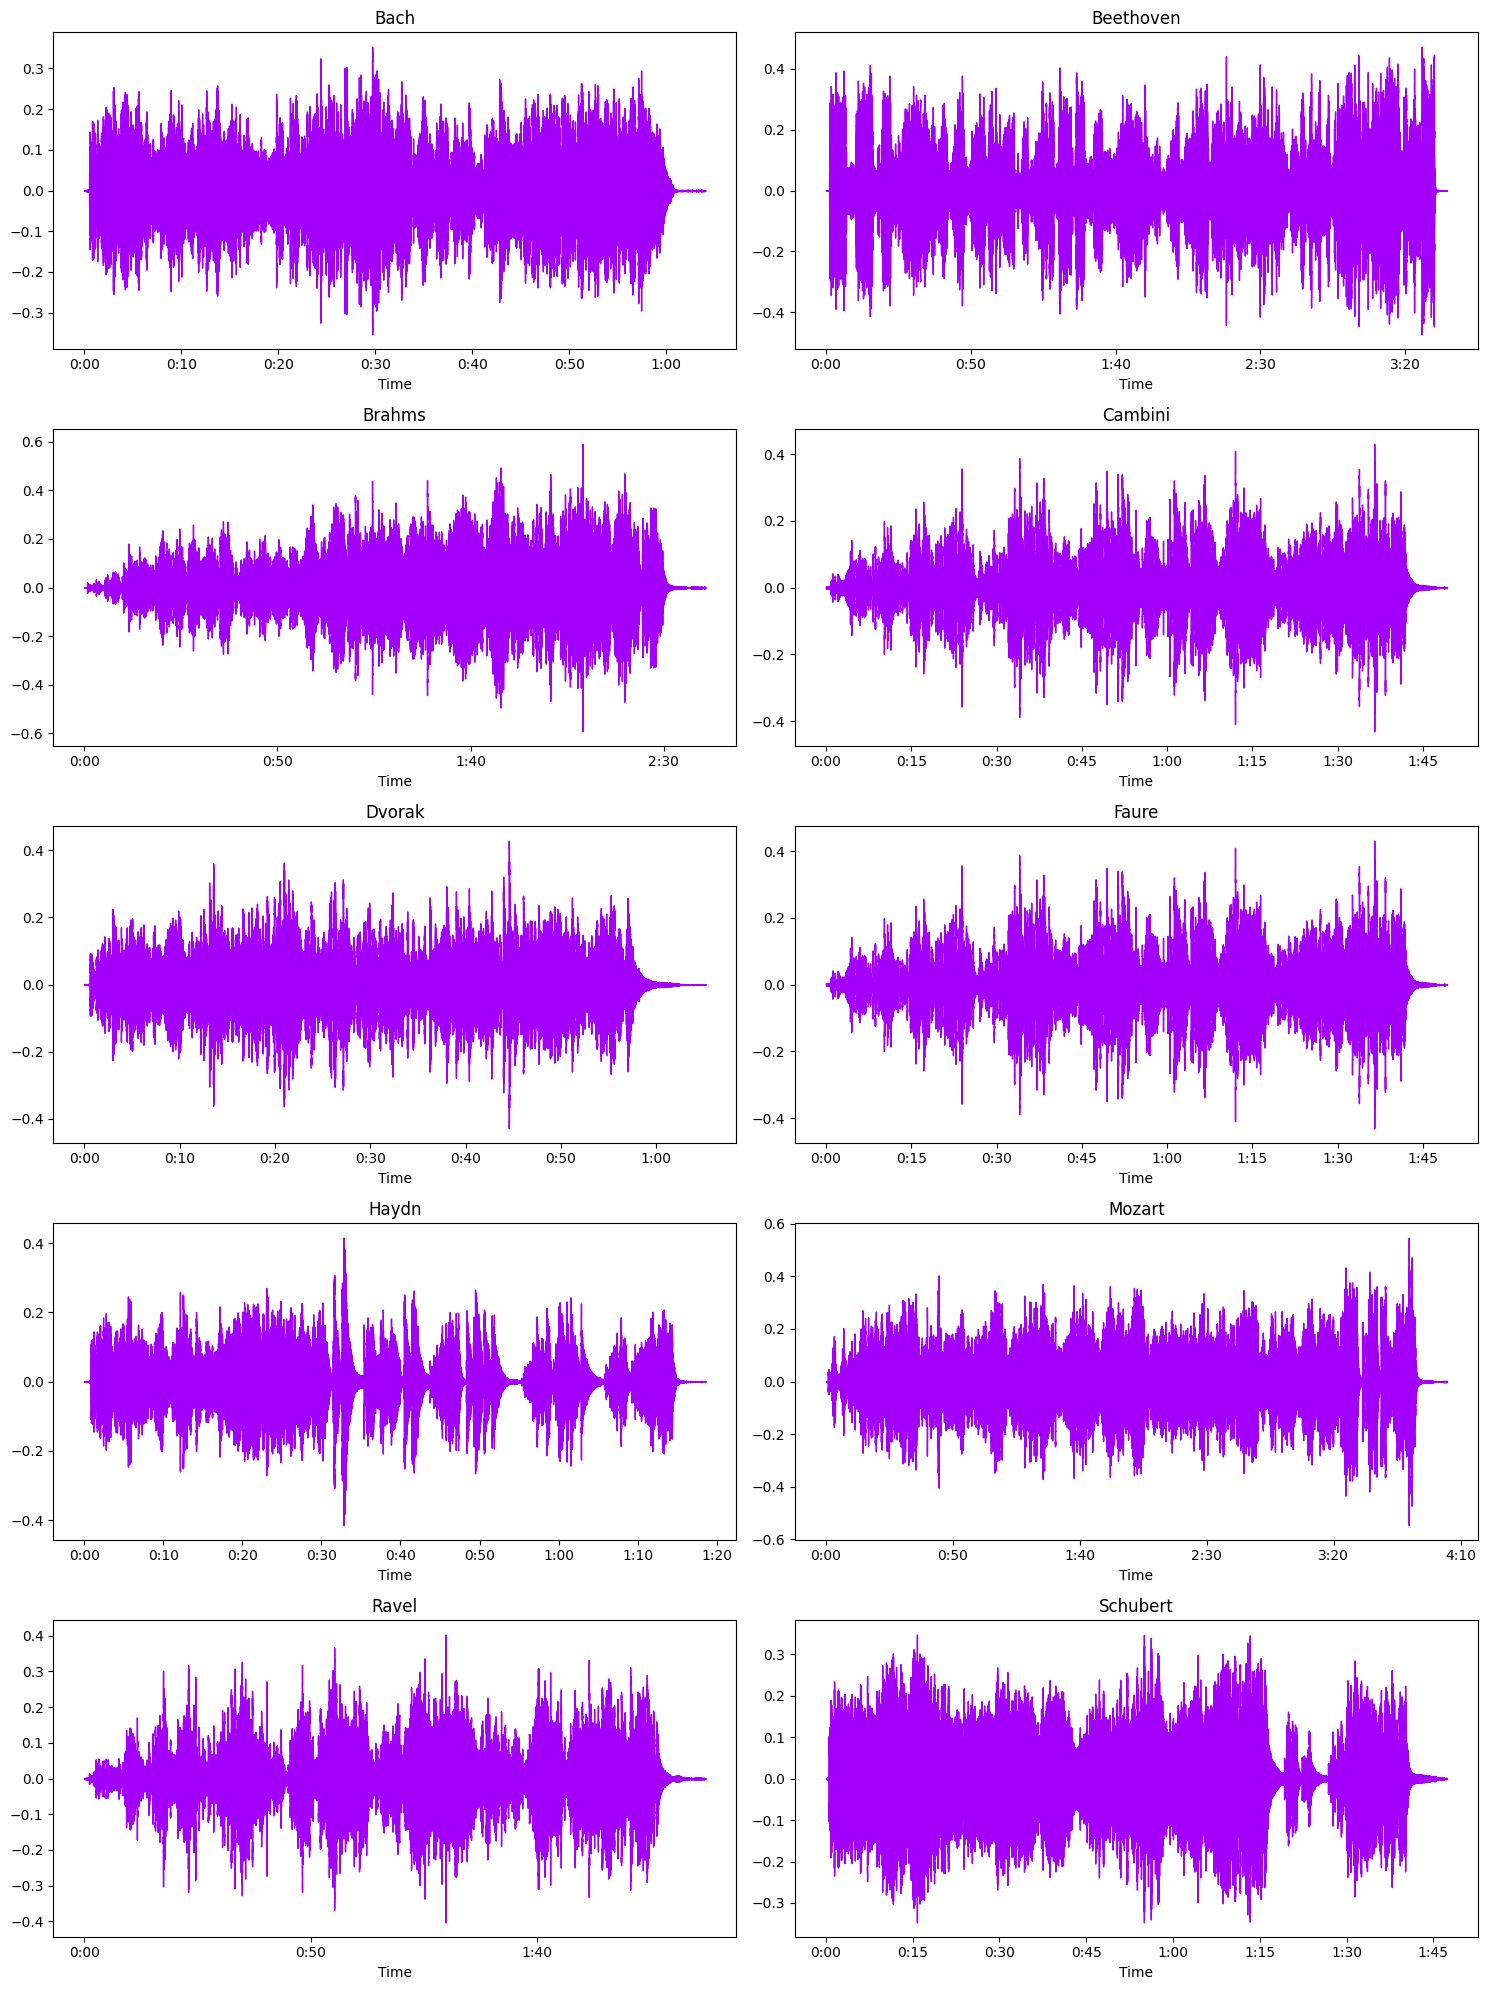

In [8]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
k = 0
j = 0
for i, id_i in enumerate(random_id_sample):
    # Reading one random audio file per composer
    data,sampling_rate = librosa.load(path_audio_files + str(id_i) + ".wav")
    
    librosa.display.waveshow(y = data, sr = sampling_rate, color = "#A300F9",ax=axes[k][j])
 

    axes[k][j].set_title(composers[i])

    if(j == 1):
        k += 1
        j = 0
    else:
        j += 1

plt.tight_layout()
plt.show()

The zero crossing rate indicates the number of times that a signal crosses the horizontal axis

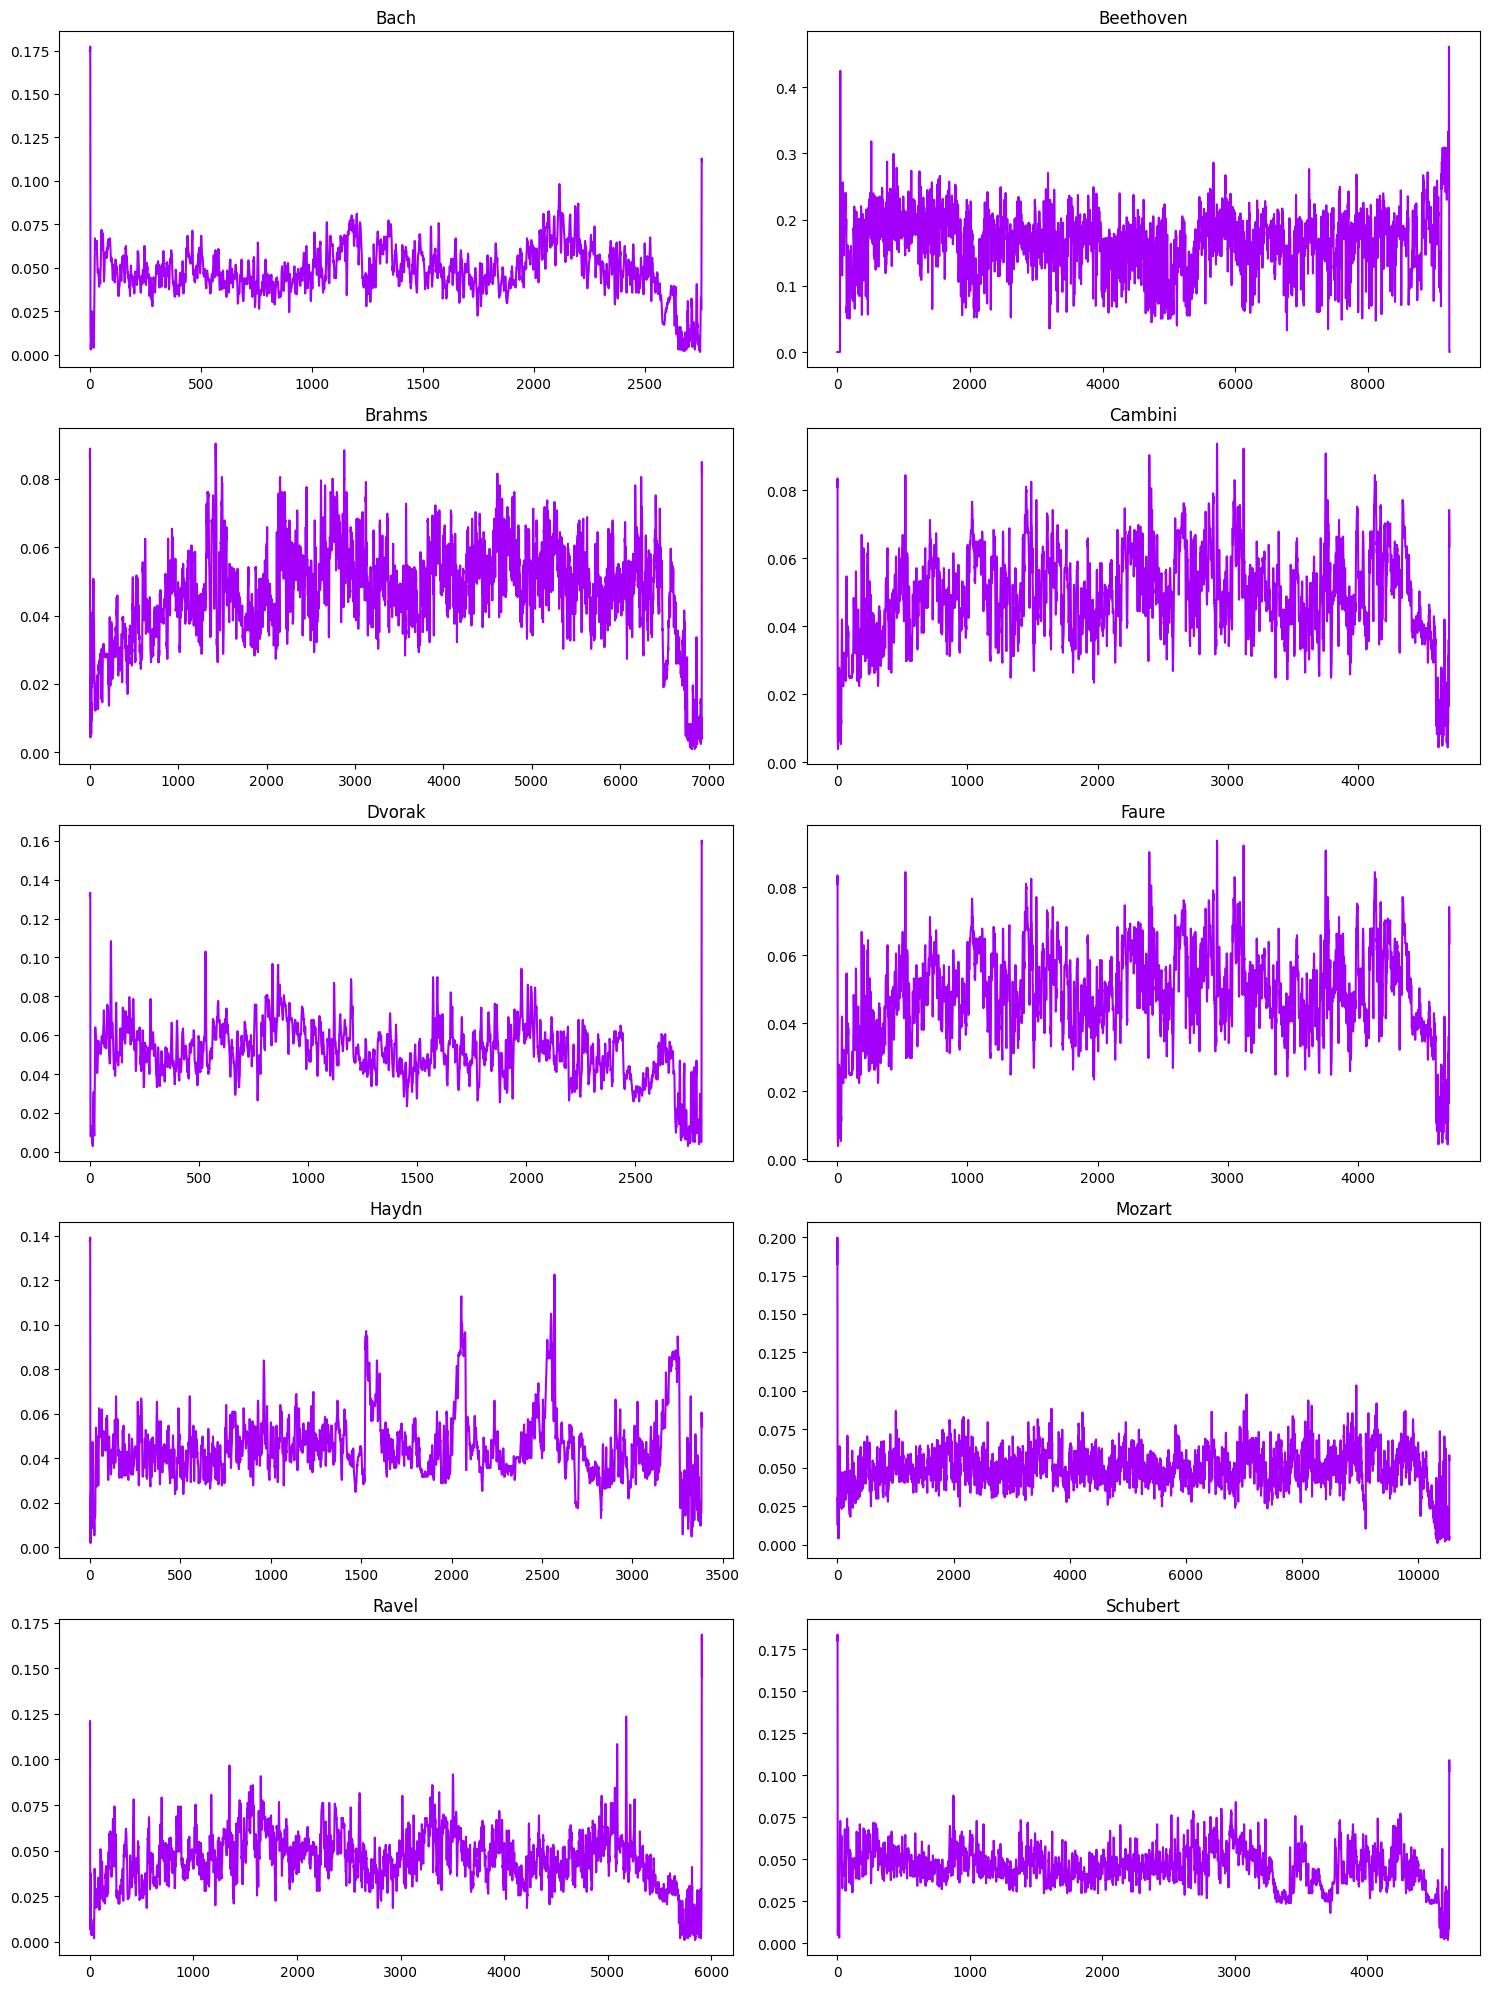

In [9]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
k = 0
j = 0
for i, id_i in enumerate(random_id_sample):
    
    # Reading one random audio file per composer
    data,sampling_rate = librosa.load(path_audio_files + str(id_i) + ".wav")
    
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y = data,hop_length = hop_length)[0]
    
    axes[k][j].plot(zero_crossing_rate,color = "#A300F9")
 
    axes[k][j].set_title(composers[i])

    if(j == 1):
        k += + 1
        j = 0
    else:
        j += 1

plt.tight_layout()
plt.show()

The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows

Hop length is the number of samples between each successive FFT

Frequency on x-axis and Intensity on y-axis

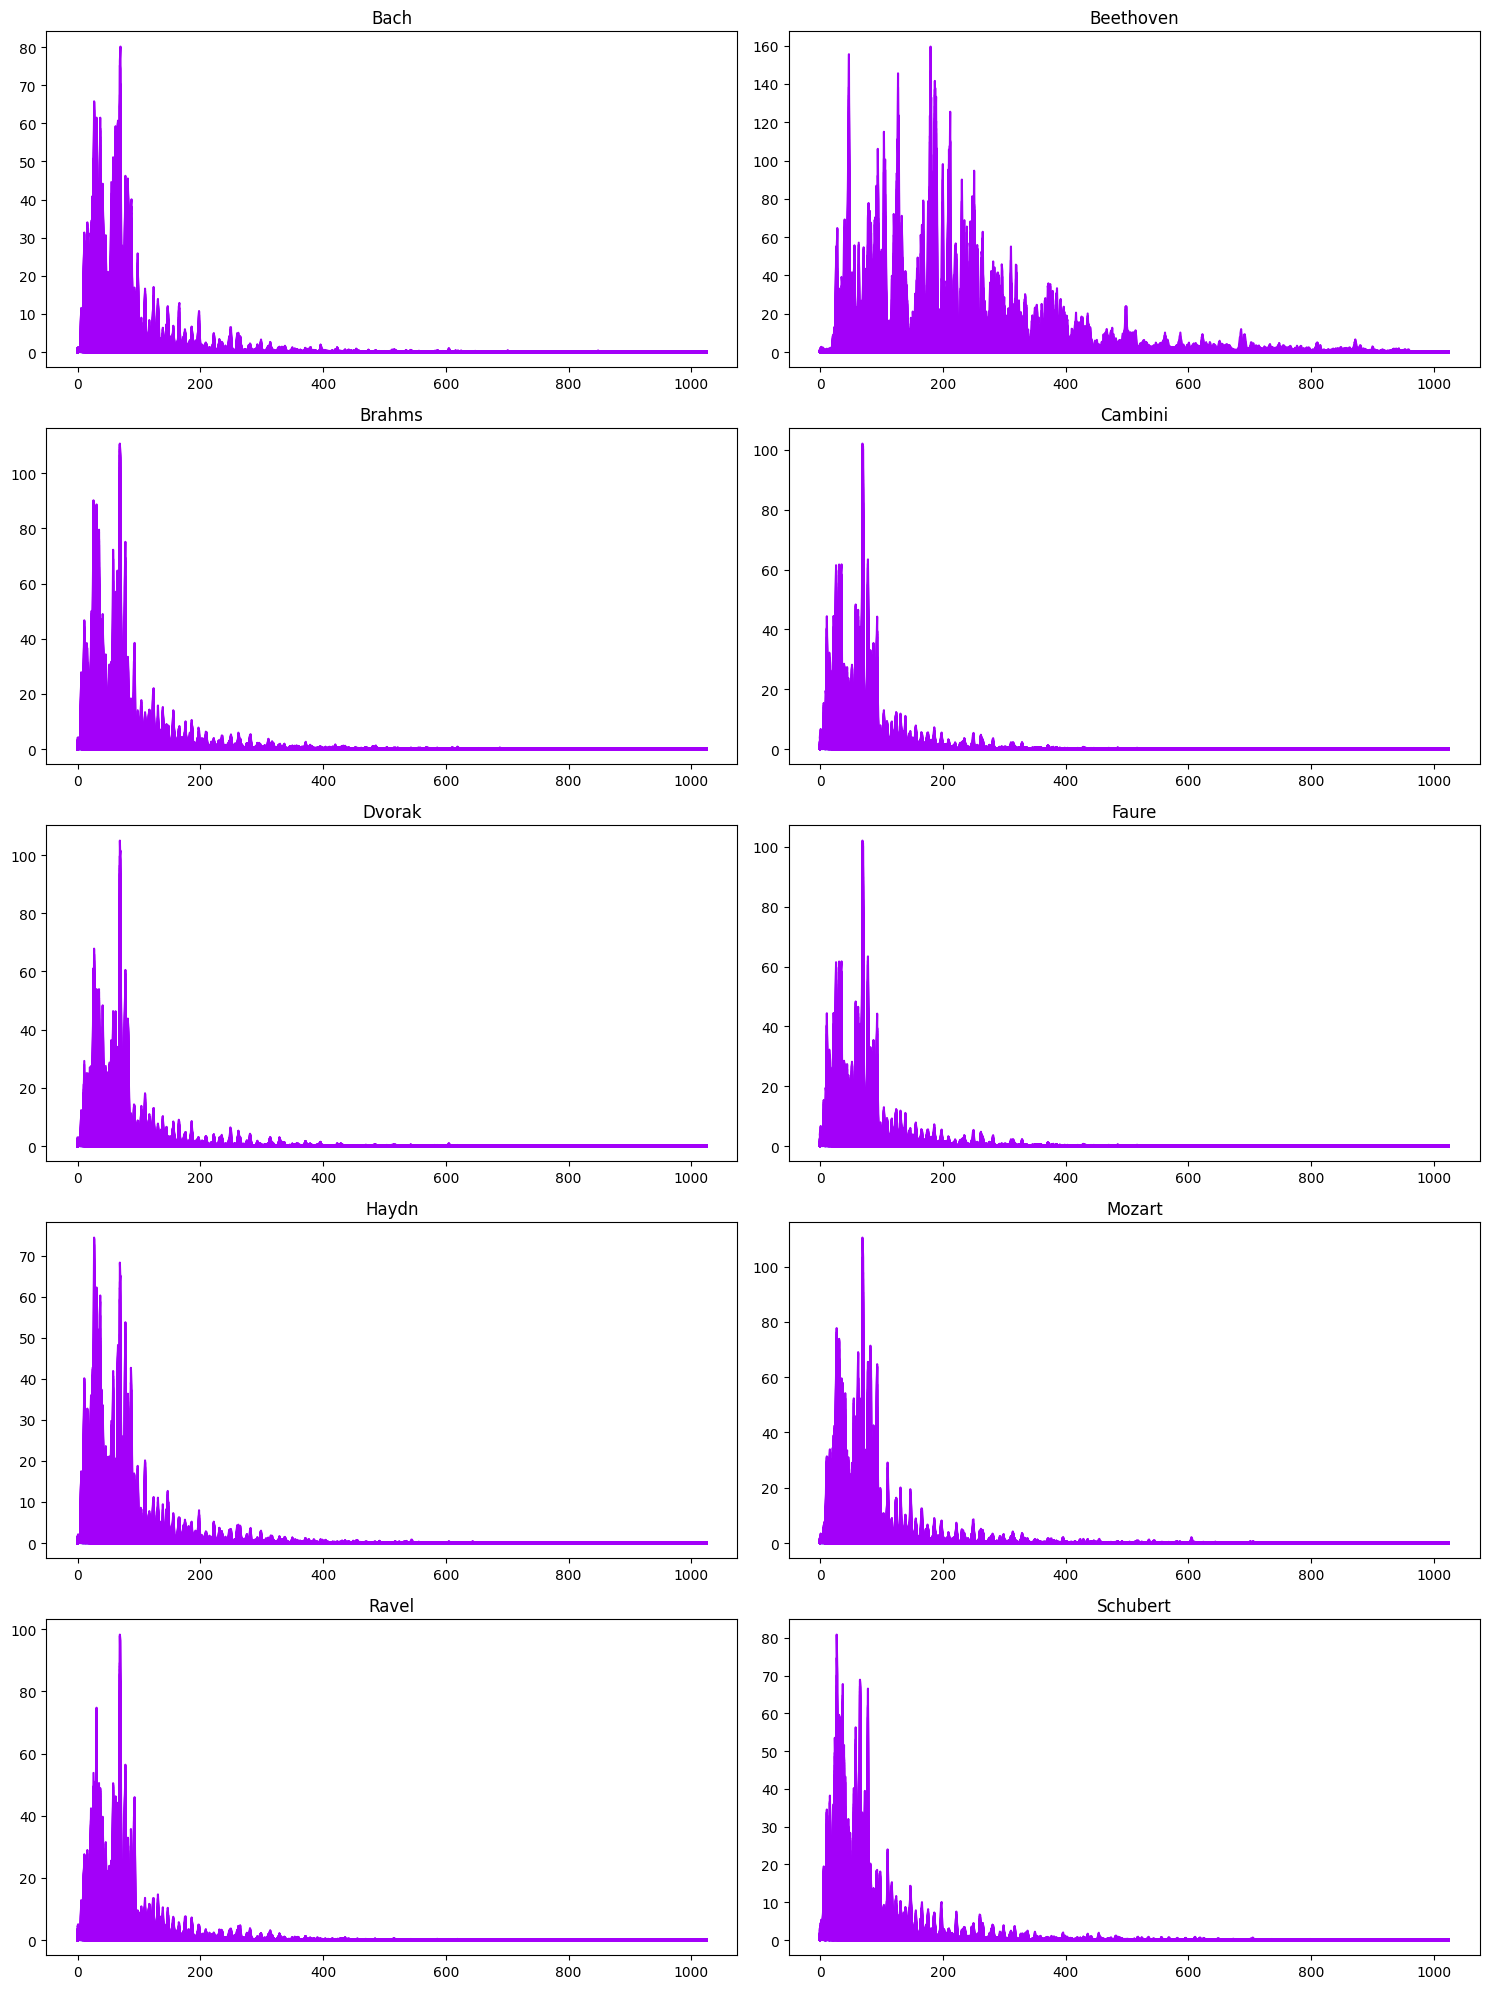

In [10]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
k = 0
j = 0
for i, id_i in enumerate(random_id_sample):
    # Reading one random audio file per composer
    data,sampling_rate = librosa.load(path_audio_files + str(id_i) + ".wav")
    
    stft_data = np.abs(librosa.stft(y = data, n_fft = n_fft,hop_length = hop_length))
    
    axes[k][j].plot(stft_data,color = "#A300F9")
 
    axes[k][j].set_title(composers[i])

    if(j == 1):
        k += 1
        j = 0
    else:
        j += 1

plt.tight_layout()
plt.show()

A Spectogram represents the intensity of a signal over time at various frequencies

Time on x-axis and Intensity of Frequency on y-axis

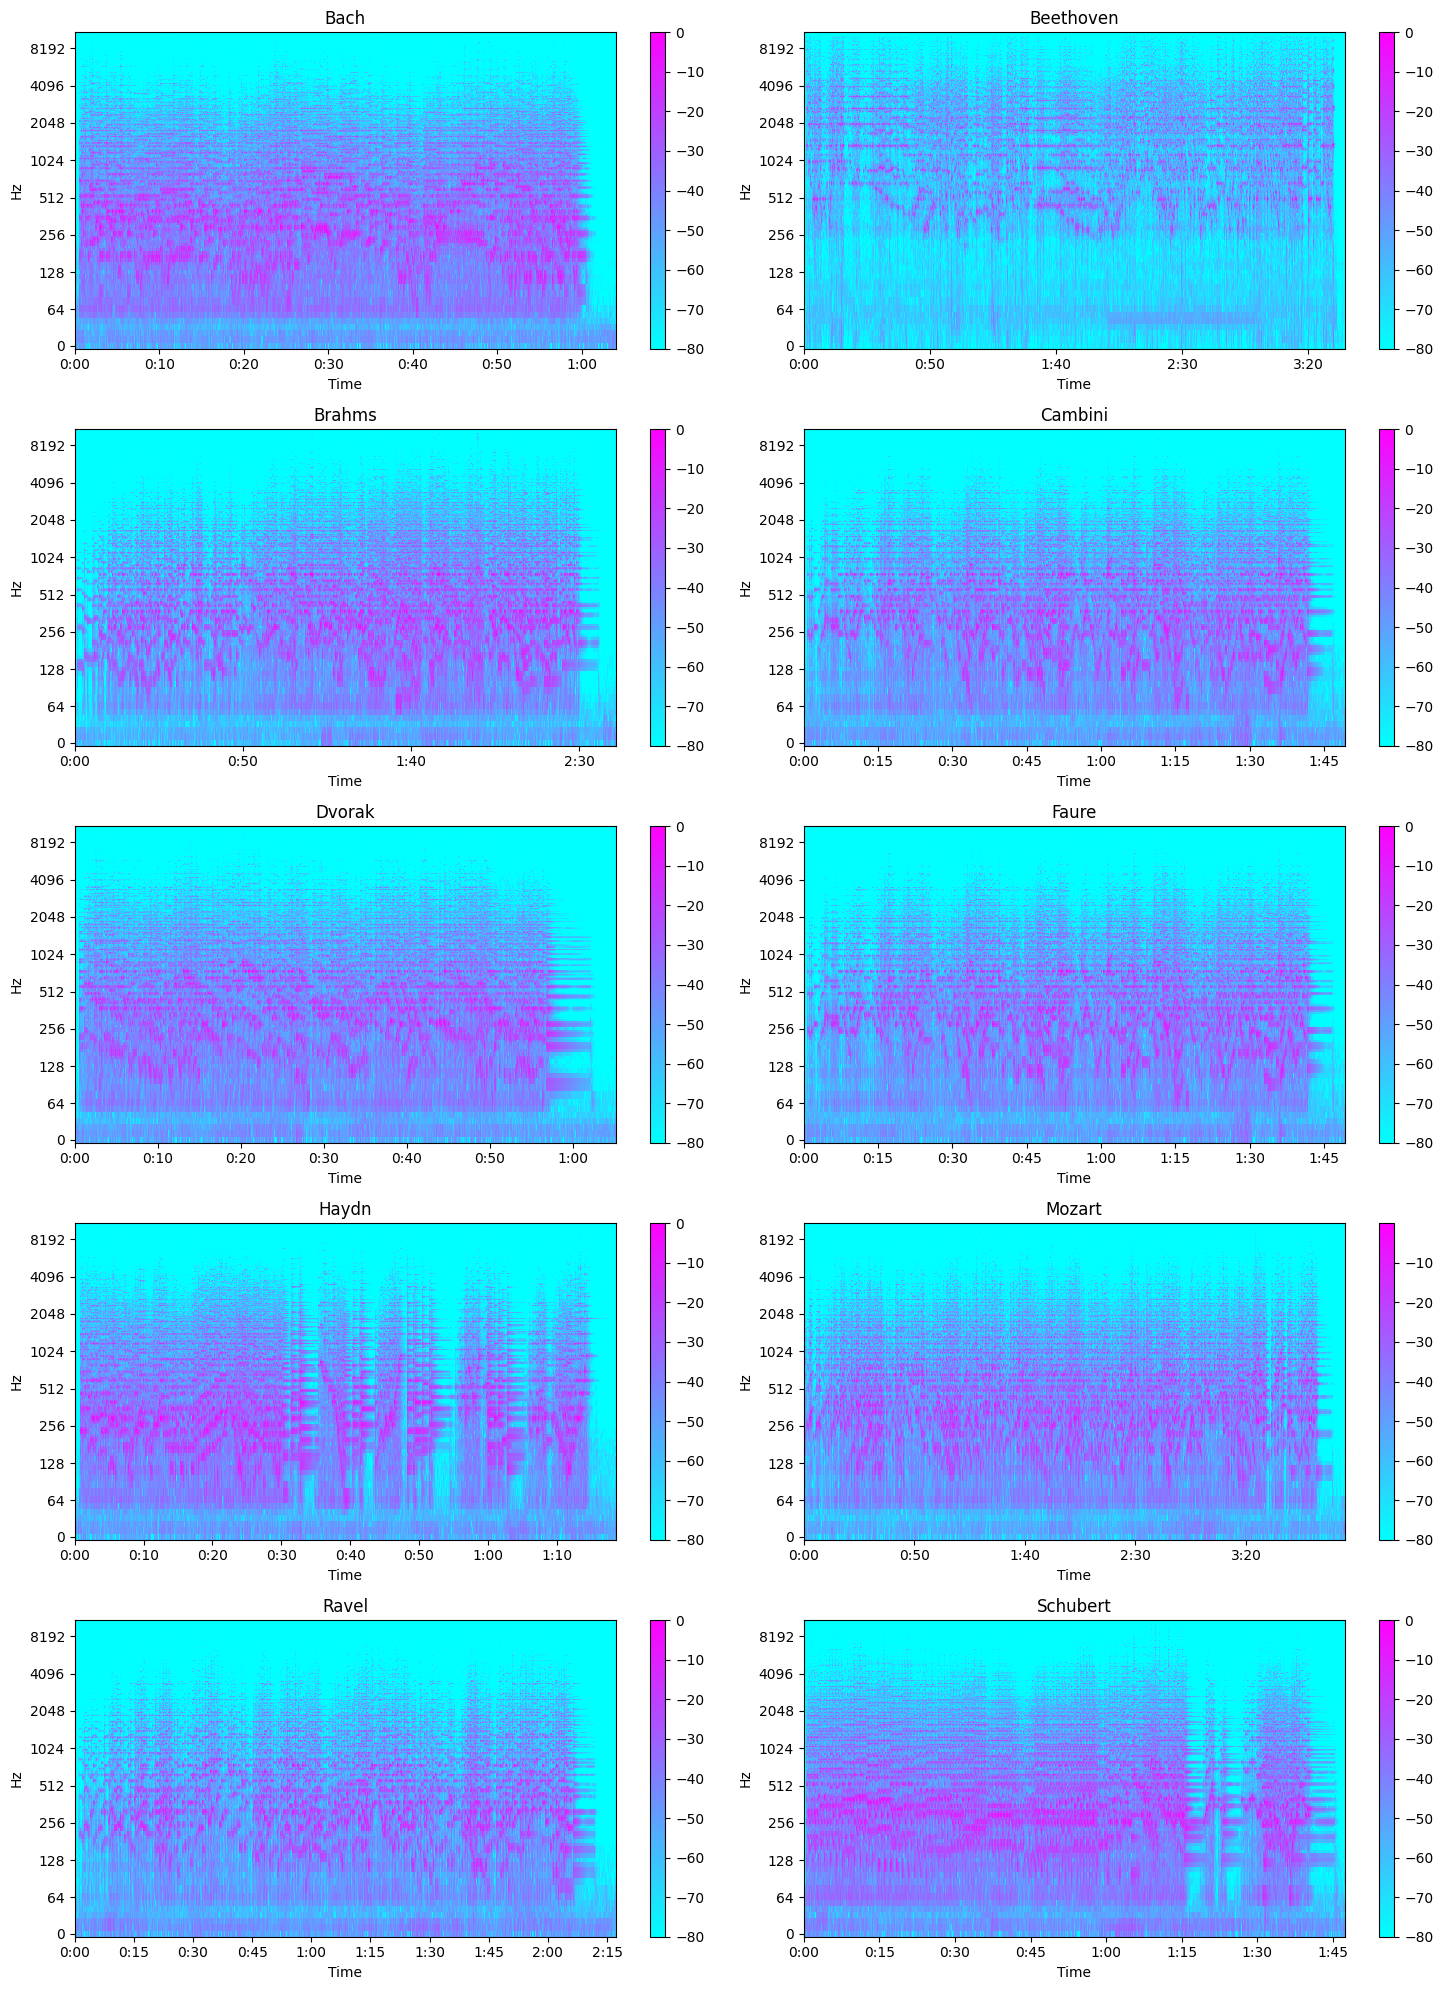

In [11]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
k = 0
j = 0
for i, id_i in enumerate(random_id_sample):
    # Reading one random audio file per composer
    data,sampling_rate = librosa.load(path_audio_files + str(id_i) + ".wav")
    
    stft_data = np.abs(librosa.stft(y = data, n_fft = n_fft,hop_length = hop_length))
    
    # Convert an amplitude spectrogram to Decibels-scaled spectrogram.
    DB = librosa.amplitude_to_db(stft_data, ref = np.max)

    img = librosa.display.specshow(DB, sr = sampling_rate, hop_length = hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool',ax=axes[k][j])
    fig.colorbar(img, ax=axes[k][j])
    
    axes[k][j].set_title(composers[i])

    if(j == 1):
        k += 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.show()

The Mel Scale is a logarithmic transformation of a signal’s frequency. The core idea of this transformation is that sounds of equal distance on the Mel Scale are perceived to be of equal distance to humans. Hence, it mimics our own perception of sound.

The transformation of frequency to mel scale is:
$m = 1127*ln(1 + f/700)$

Mel Spectrograms are spectrograms that visualize sounds on the Mel scale as opposed to the frequency domain

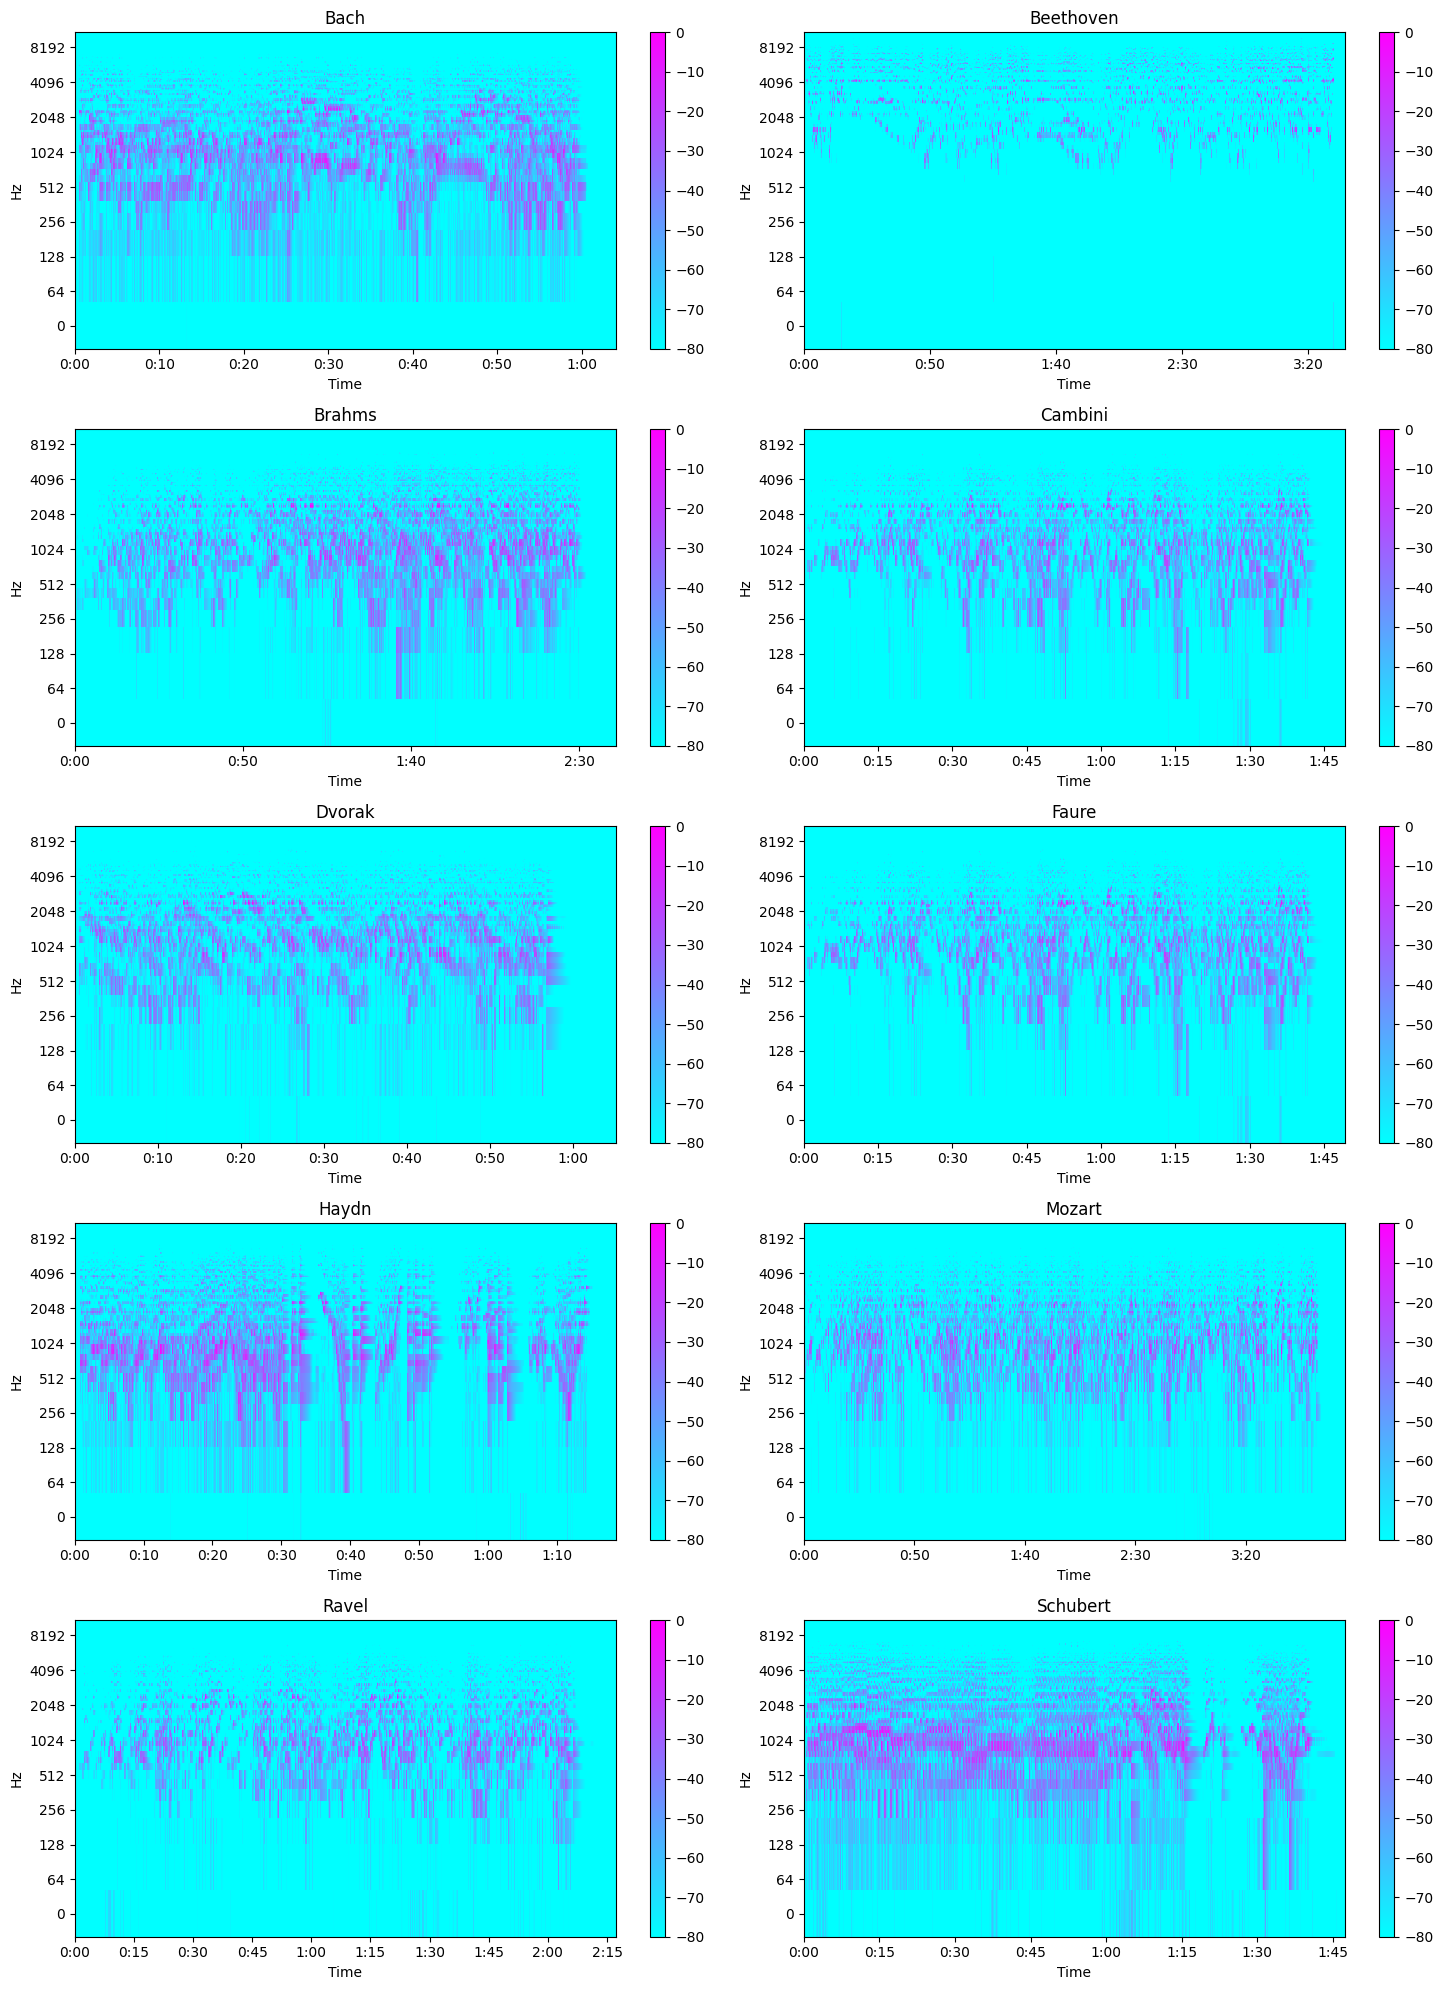

In [12]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
k = 0
j = 0
for i, id_i in enumerate(random_id_sample):
    # Reading one random audio file per composer
    data,sampling_rate = librosa.load(path_audio_files + str(id_i) + ".wav")
    
    mel_spec = librosa.feature.melspectrogram(y=data, sr=sampling_rate, hop_length=hop_length)
    
    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

    img = librosa.display.specshow(mel_spec_db, sr = sampling_rate, hop_length = hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool',ax=axes[k][j])
    fig.colorbar(img, ax=axes[k][j])
    
    axes[k][j].set_title(composers[i])

    if(j == 1):
        k += 1
        j = 0
    else:
        j += 1

plt.tight_layout()
plt.show()

Chromagram sequence of chroma features each expressing how the representation's pitch content within the time window is spread over the twelve chroma bands/pitches

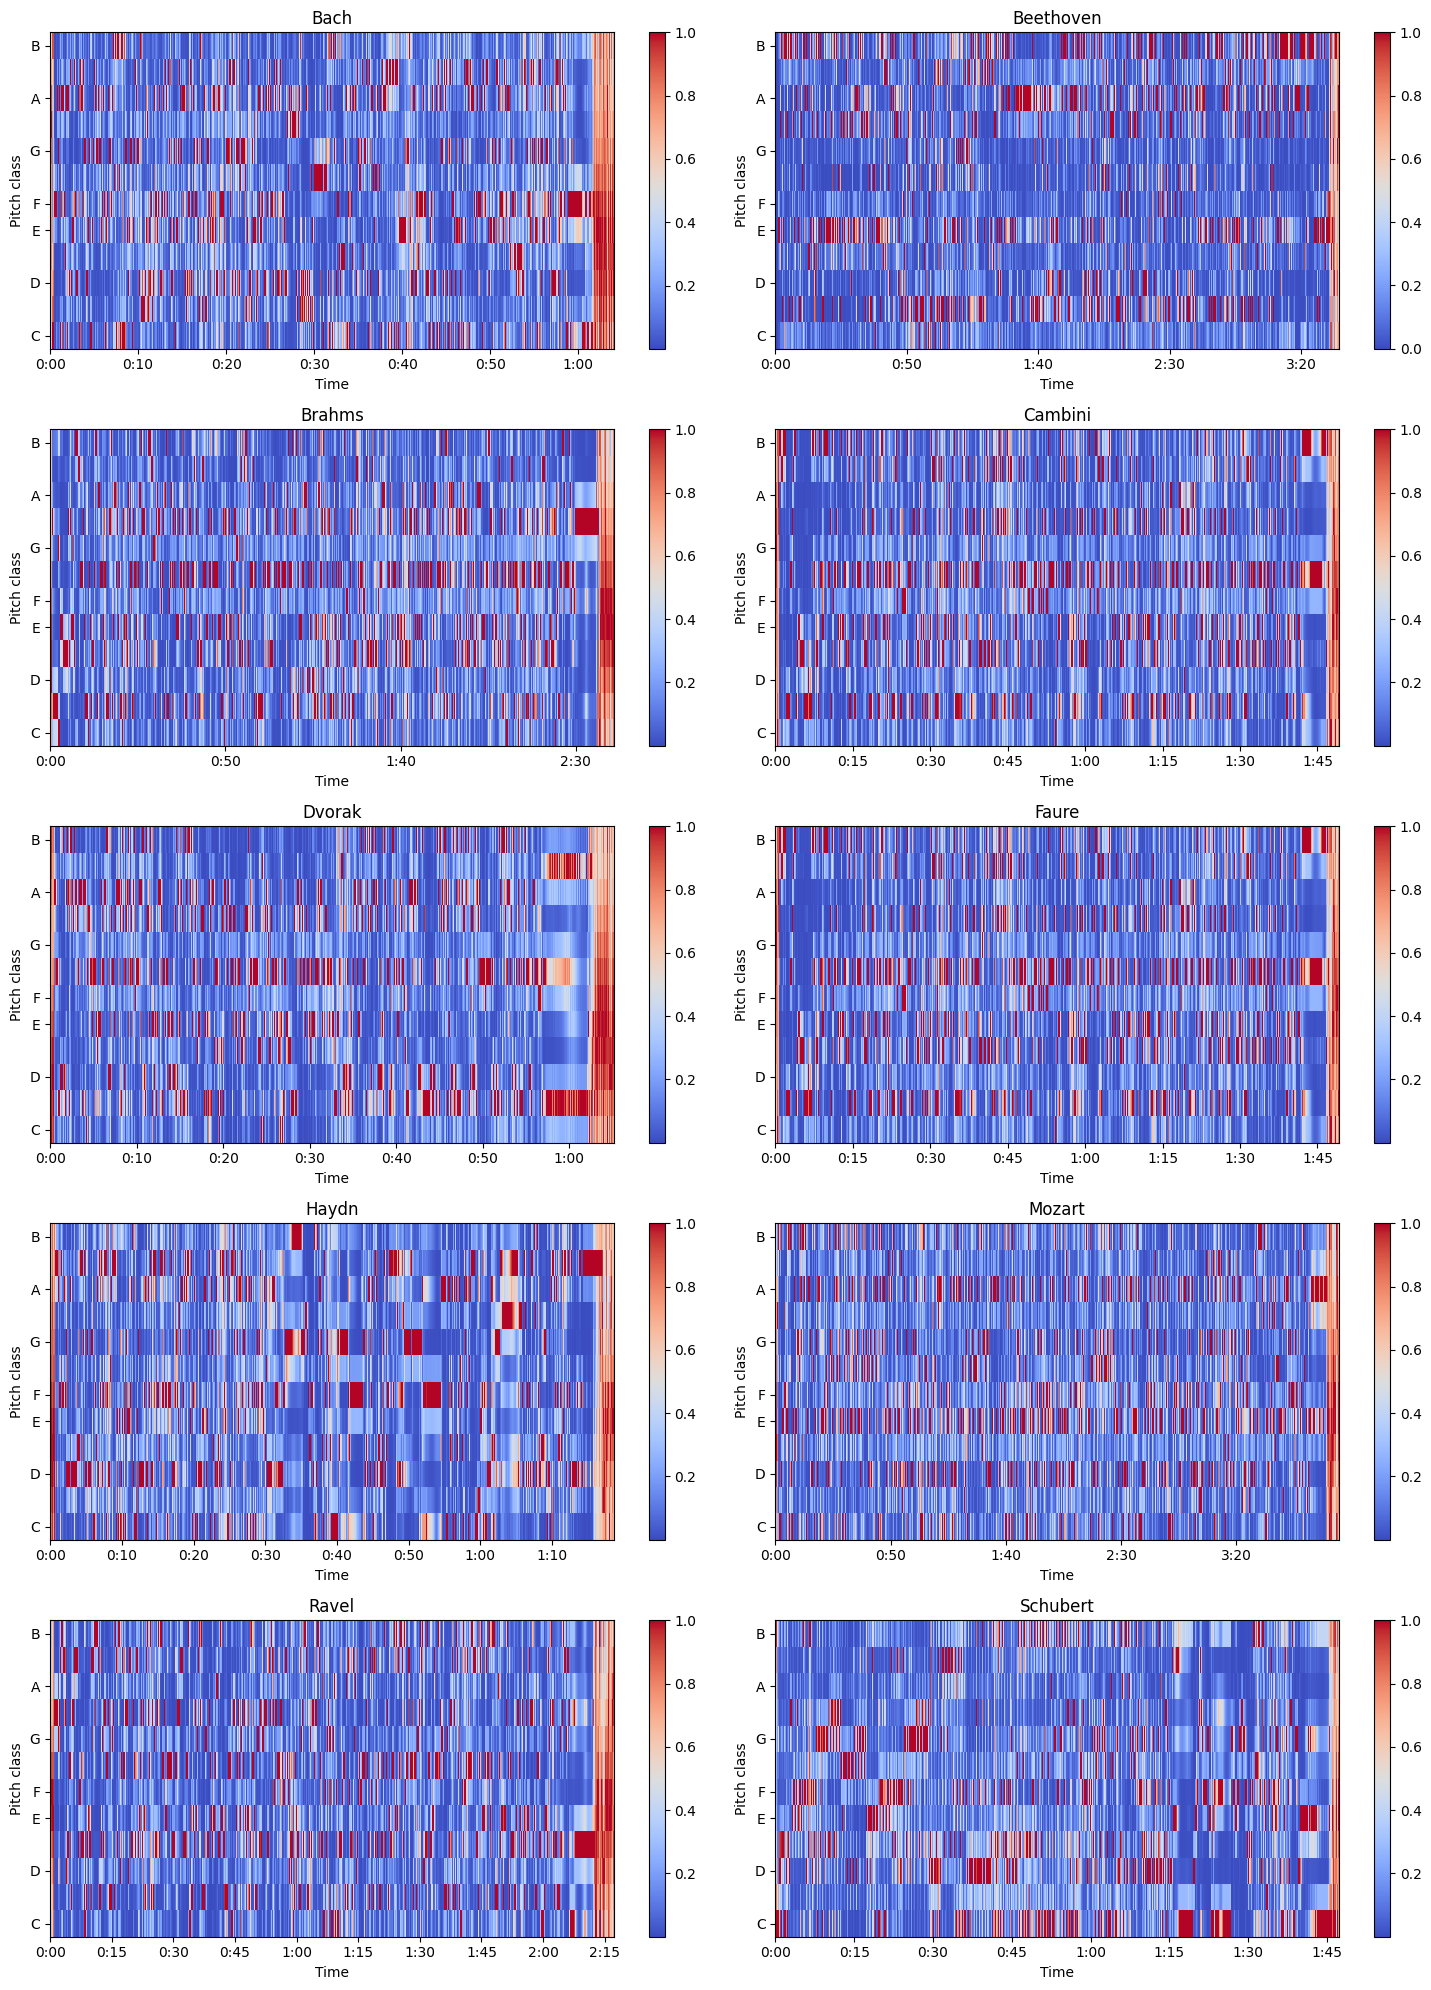

In [14]:
# Increase or decrease hop_length to change how granular you want your data to be

fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
k = 0
j = 0
for i, id_i in enumerate(random_id_sample):
    # Reading one random audio file per composer
    data,sampling_rate = librosa.load(path_audio_files + str(id_i) + ".wav")
    
    # Chromogram
    chromagram = librosa.feature.chroma_stft(y=data, sr=sampling_rate, hop_length=hop_length)
    #print('Chromogram shape:', chromagram.shape)

    #plt.figure(figsize=(16, 6))
    img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm',ax=axes[k][j])
    fig.colorbar(img, ax=axes[k][j])
    
    axes[k][j].set_title(composers[i])

    if(j == 1):
        k += + 1
        j = 0
    else:
        j += 1

plt.tight_layout()
plt.show()

References:
Preprocessing: https://www.kaggle.com/code/austintbarton/preprocessing-audio-data-gtzan/edit

Data: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification

https://www.kaggle.com/code/andradaolteanu/work-w-audio-data-visualise-classify-recommend/notebook

https://librosa.org/doc/main/